## Task 1

The amounts of solids removed from a particular material when exposed to drying periods of differentlengths are as shown.

•Estimate the linear regression line.
•Test at the 0.05 level of significance whether the linear model is adequate.

### Estimate the linear regression line:
1. I found a mathematical formula which can be used in order to compute the slope and intercept, and first I tried to do it in this way, just to see what results would I get and to have something that I could check the next result with.

In [1]:
import numpy as np

time_values = np.array([4.4, 4.4, 4.5, 4.5, 4.8, 4.8, 5.5, 5.5, 5.7, 5.7, 5.9, 5.9, 6.3, 6.3, 6.9, 6.9, 7.5, 7.5, 7.8, 7.8])
solid_values = np.array([13.1, 14.2, 9.0, 11.5, 10.4, 11.5, 13.8, 14.8, 12.7, 15.1, 9.9, 12.7, 13.8, 16.5, 16.4, 15.7, 17.6,
                       16.9, 18.3, 17.2])


time_values_squared = np.square(time_values)
print(str(time_values_squared))

solid_values_squared = np.square(solid_values)
print(str(solid_values_squared))

values_multiplied = np.multiply(time_values, solid_values)
print(str(values_multiplied))

slope = (np.multiply(np.mean(time_values), np.mean(solid_values)) 
             - np.mean(values_multiplied))/(np.square(np.mean(time_values))-np.mean(time_values_squared))
print("Slope of the fitted line is : " + str(slope))

intersect = np.mean(solid_values) - slope*np.mean(time_values)
print("The intersect of the fitted line is : " +  str(intersect))

[19.36 19.36 20.25 20.25 23.04 23.04 30.25 30.25 32.49 32.49 34.81 34.81
 39.69 39.69 47.61 47.61 56.25 56.25 60.84 60.84]
[171.61 201.64  81.   132.25 108.16 132.25 190.44 219.04 161.29 228.01
  98.01 161.29 190.44 272.25 268.96 246.49 309.76 285.61 334.89 295.84]
[ 57.64  62.48  40.5   51.75  49.92  55.2   75.9   81.4   72.39  86.07
  58.41  74.93  86.94 103.95 113.16 108.33 132.   126.75 142.74 134.16]
Slope of the fitted line is : 1.8428637663240979
The intersect of the fitted line is : 3.126817865698099


2. In this second step, I used the Linear Regression model to from the scikit-learn library to estimate the line. Thus, I converted the data that I have from the problem in dataframe type. Linear Regression basically finds a line that fits our data the best, and in doing so the model finds the best fitting slope and intercept for the line.

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

#put the columns together into one dataframe
pairs = {'time': time_values, 'solids':solid_values}
data = pd.DataFrame(data=pairs)
data

,time,solids
0,4.4,13.1
1,4.4,14.2
2,4.5,9.0
3,4.5,11.5
4,4.8,10.4
5,4.8,11.5
6,5.5,13.8
7,5.5,14.8
8,5.7,12.7
9,5.7,15.1


In [3]:
#define the independent/dependent values
x = data.time
y = data.solids

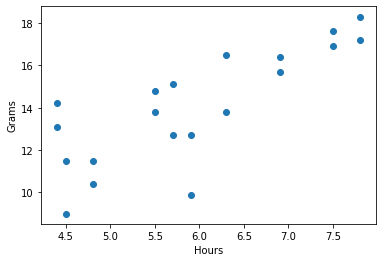

In [4]:
#plot the data
plt.xlabel('Hours')
plt.ylabel('Grams')
plt.scatter(x,y)

Model slope:     1.8428637663240854
Model intercept: 3.1268178656981718


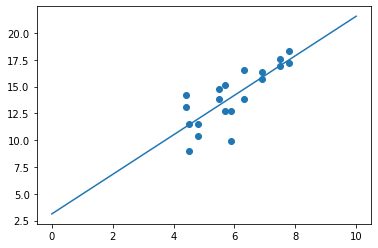

In [5]:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])


print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)


plt.scatter(x, y)
plt.plot(xfit, yfit);

In the results here, we obtained the model slope and intercept, and also have plotted the line that fits the data the best.
The equation for the line is **y = 3.1268 + 1.8429*x**.

3. And since I found out that scikit-learn's Linear Regression does not have the function of looking at the significance, I looked into other Python solutions. Statsmodels has the ordinary least squares(OLS) package, which turned out to be quite simple to use. It has the summary() function, which will output the OLS regression results.

In [6]:
const = sm.add_constant(x)
results = sm.OLS(y, const).fit()
results.summary()

C:\Users\begav\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 solids   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     31.35
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           2.59e-05
Time:                        20:39:02   Log-Likelihood:                -37.635
No. Observations:                  20   AIC:                             79.27
Df Residuals:                      18   BIC:                             81.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1268      1.987      1.573      0.133      -1.049       7.302
time           1.8429      0.329      5.599      0.000       1.151       2.534
==============================================================================
Omnibus:                        2.646   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.266   Jarque-Bera (JB):                1.206
Skew:                          -0.561   Prob(JB):                        0.547
Kurtosis:                       3.434   Cond. No.                         32.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What can be understood from this descriptive OLS regression results?
Looking at the **R squared** value of 0.635, I would say this is not the best result of how well the line would fit the data.

### Test at the 0.05 level of significance whether the linear model is adequate:
This can be analyzed by looking at the p_value in the table (P>|t|). Usually, if the value is smaller than 0.05, then it means that the model is statistically significant. And as it can be seen from the table, our model is statistically significant --> it tells us that one value helps explains the other.

## Task 3

Use the SVD to extract the important features from the given image. Let’s start by loading the given imagein python and convert it to a Numpy array. We will convert it to grayscale to have one dimension per pixel.The shape of the matrix corresponds to the dimension of the image filled with intensity values: one cellper pixel.

•Let’s start to extract the left singular vectors, the singular values and the right singular vectors andcheck the shapes of the matrices.
•Reconstruct an image from a certain number of singular values. For instance reconstruct 699p x1000p image from two singular values.
•We will now draw the reconstruction using different number of singular values (use n=5, 10, 15,20, 30, 50).

In [7]:
from sklearn.decomposition import TruncatedSVD
import scipy.linalg as LA
from PIL import Image
from numpy import diag
from numpy import dot
from numpy import zeros

#read the image, change to grayscale and then convert it into an array
#reshape the image
image = Image.open('test.png')
image = image.convert('L')
img = np.asarray(image.getdata(), dtype = np.float64).reshape((image.size[1], image.size[0]))

img.shape

(412, 621)

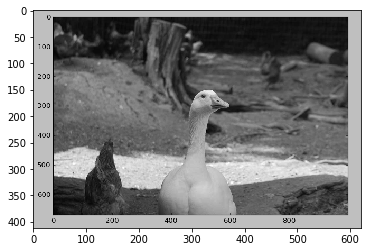

In [8]:
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

In [9]:
#calculate the singular value decomposition and then check the shapes of the matrices
U, s, VT = LA.svd(img)
print('The shape of the left singular vectors : ' + str(U.shape))
print('The shape of the singular values : ' + str(s.shape))
print('The shape of the right-singular vectors : ' + str(VT.shape))

The shape of the left singular vectors : (412, 412)
The shape of the singular values : (412,)
The shape of the right-singular vectors : (621, 621)


In [10]:
#create 2D Sigma matrix and then populate it with the diagonal matrix
Sigma = zeros((img.shape[0], img.shape[1]))
Sigma[:min(img.shape[0], img.shape[1]), :min(img.shape[0], img.shape[1])] = np.diag(s)

In [11]:
#reconstructing the original matrix
rec = U.dot(Sigma.dot(VT))
print(rec)

[[191. 191. 191. ... 191. 191. 191.]
 [191. 191. 191. ... 191. 191. 191.]
 [191. 191. 191. ... 191. 191. 191.]
 ...
 [191. 191. 191. ... 191. 191. 191.]
 [191. 191. 191. ... 191. 191. 191.]
 [191. 191. 191. ... 191. 191. 191.]]


In [12]:
#function for plotting the original and the reconstructed images
def ShowImage(original, reconstructed):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,18))
    plt.subplots_adjust(wspace=0.3, hspace=0.2)

    ax1.imshow(original, cmap='gray')
    ax1.set_title("Original image")

    ax2.imshow(reconstructed, cmap='gray')
    ax2.set_title("Reconstructed image")
    plt.show()

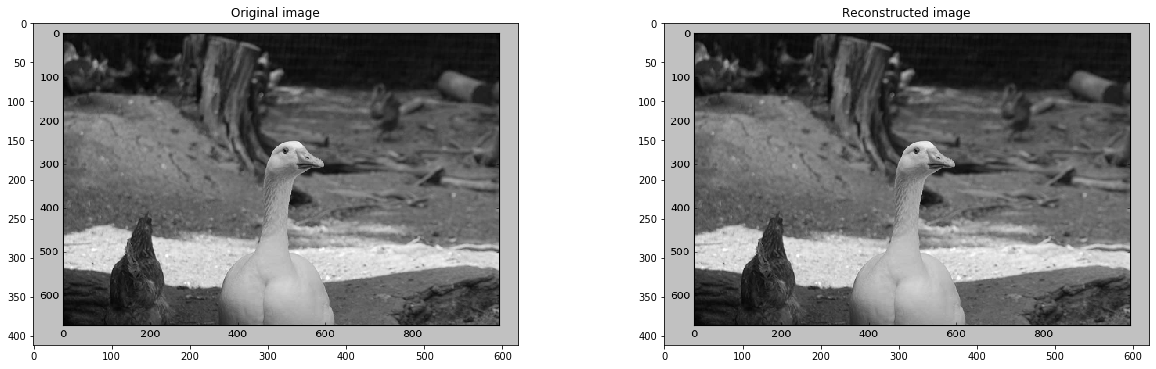

In [13]:
#full reconstruction
ShowImage(img, rec)

In [14]:
k = 2
img_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

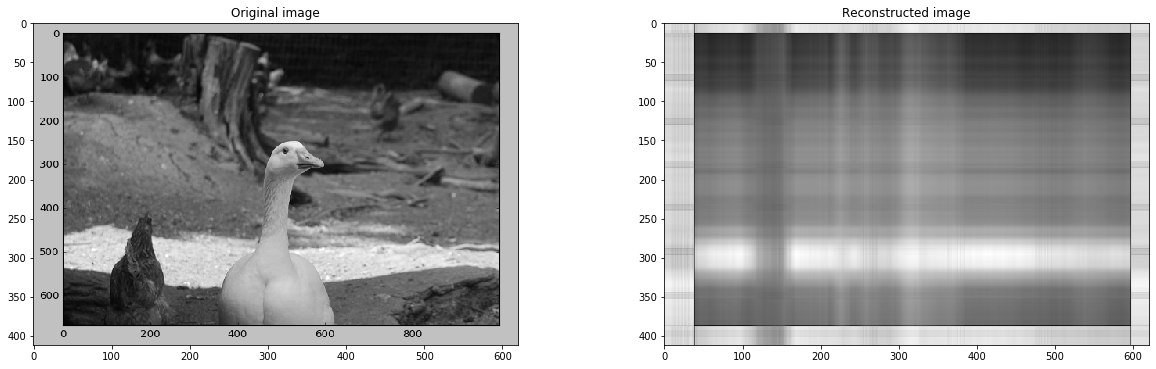

In [15]:
#reconstruction using the first 2 singular values
ShowImage(img, img_approx)

Original image vs. Reconstructed image using the first 5 singular values.


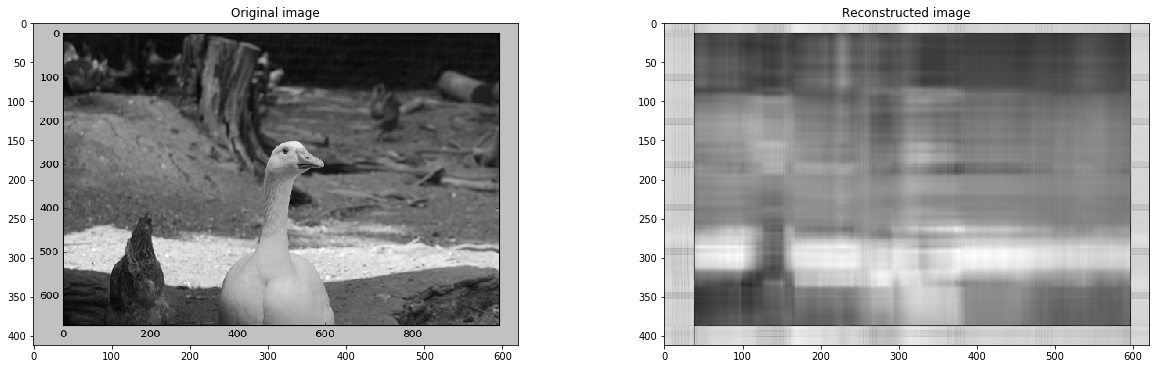

Original image vs. Reconstructed image using the first 10 singular values.


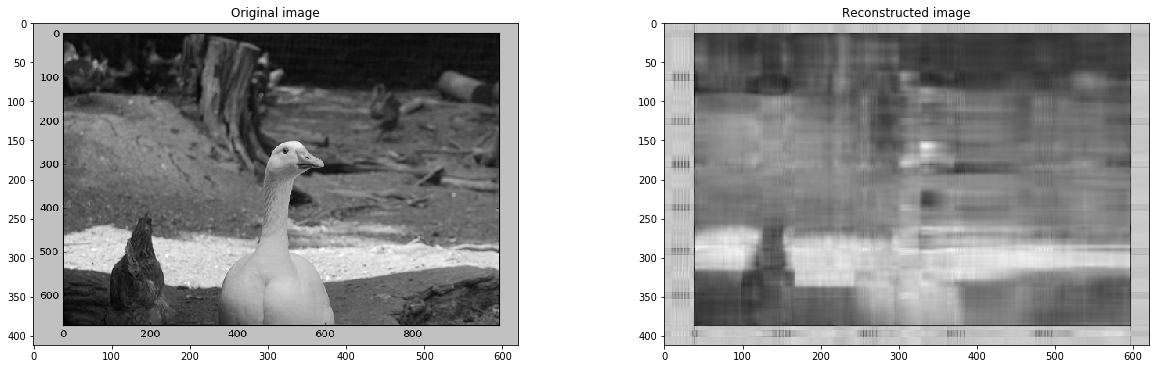

Original image vs. Reconstructed image using the first 15 singular values.


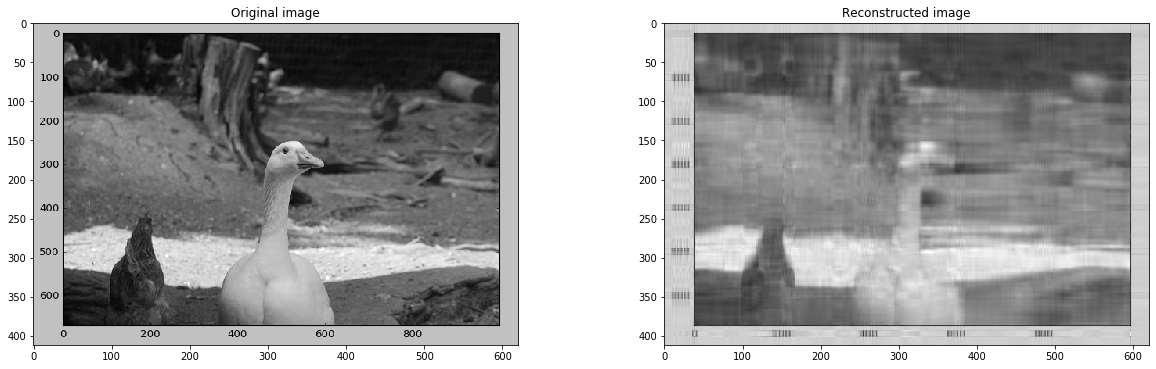

Original image vs. Reconstructed image using the first 20 singular values.


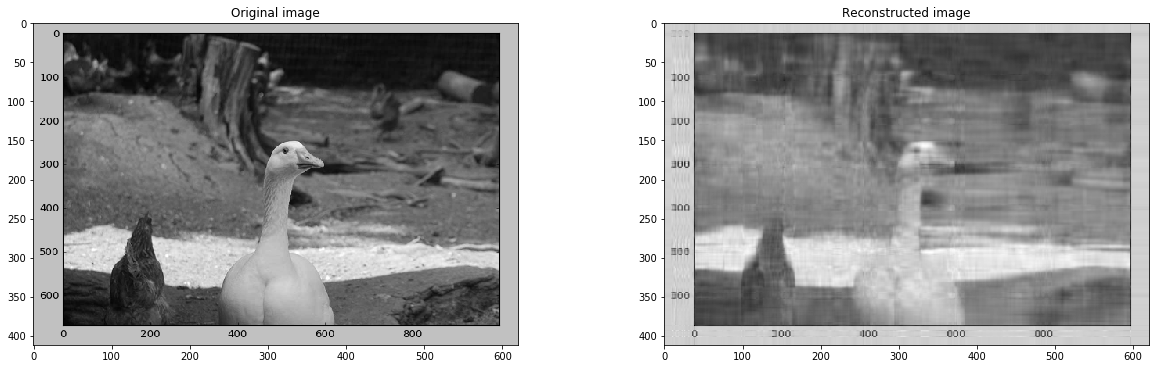

Original image vs. Reconstructed image using the first 30 singular values.


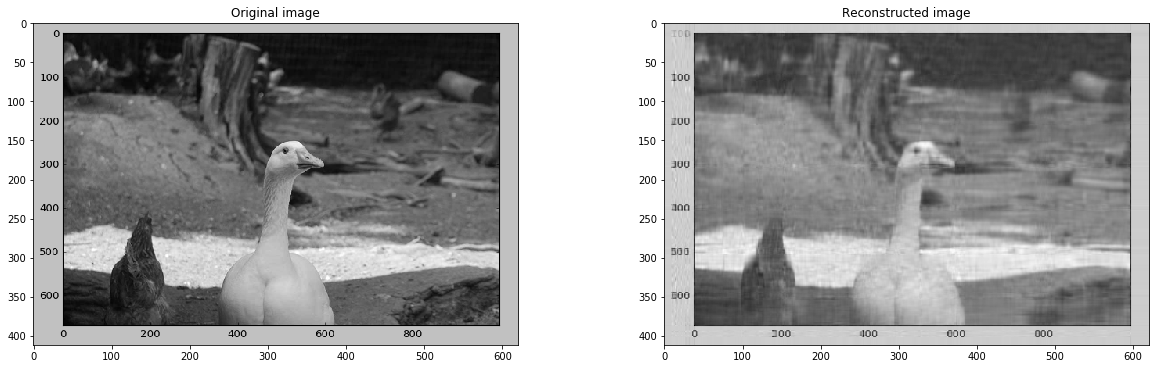

Original image vs. Reconstructed image using the first 50 singular values.


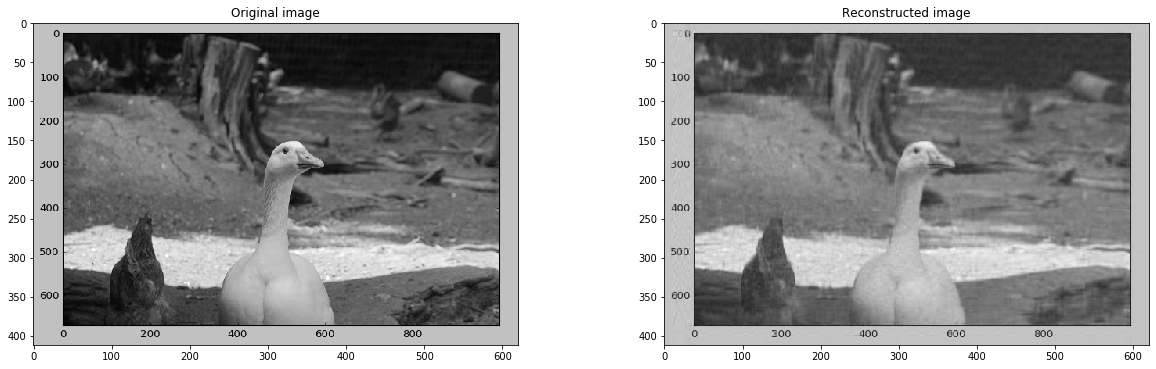

In [16]:
#reconstruction using different numbers of singular values
values = [5, 10, 15, 20, 30, 50]

for x in values:
    k = x
    img_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]
    print('Original image vs. Reconstructed image using the first {} singular values.'.format(k))
    ShowImage(img, img_approx)

**Conclusion and Thoughts on SVD:**
So, if the image size originally is 412 x 621, it would mean that we'd need to store 255852 values for this image. But from the obtained results, I can see that by using first 50 singular values to reconstruct the image also gives me a good image (clearly still a goose). With 50 first singular values, we'd need to store 50 * (1 + 412 + 621) = 51700 values - this makes for the 20% of the values needed for the original image.

## Task 4

Consider the following feature matrix (X) and associated labels vector (y), which hasn= 10 training examples and d= 4 features.

Using the naïve Bayes classifier model for the feature matrix and label vector, compute and predict theclassification label for the following given text example:
ˆx=[1  1  0  1].

In [56]:
#transform the data into a dataframe
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics

raw = {'1': [0,1,0,1,1,0,1,1,1,1], '2': [1,1,0,1,1,0,0,0,1,0], '3': [0,1,1,0,1,1,0,1,1,0], '4': [1,0,1,0,0,0,1,0,1,0],
      'labels': [1,1,1,1,1,1,0,0,0,0]}

df = pd.DataFrame(data=raw)
df.head()

,1,2,3,4,labels
0,0,1,0,1,1
1,1,1,1,0,1
2,0,0,1,1,1
3,1,1,0,0,1
4,1,1,1,0,1


In [57]:
#separate into features and labels
X = df.drop(['labels'], axis = 1)
Y = df.labels

In [58]:
#use the bernoulli model and see how it performs
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 1)
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)

y_pred = bnb.predict(X_test) 
print("Bernoulli Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 50.0


In [60]:
#classify the given sample
xhat = np.array([[1,1,0,1]])

y_pred = bnb.predict(xhat)
print("Predicted label for the new sample is : ",  y_pred)

Predicted label for the new sample is :  [1]


For this Naive Classifier, the Bernoulli model was used, since the features are binary. From the model accuracy one can actual see that it is not soo good, which why in fact such classifiers should serve for initial baseline classification only. Then prediction of the label of the given sample was performed.